# Diwali Sales Analysis

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
# let us import the csv file
df=pd.read_csv('C:\\Users\\DELL\\Desktop\\Diwali EDA\\diwali_sales.csv',encoding='unicode escape')
df.sample(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
4378,1002986,Boyes,P00028842,M,26-35,26,0,Delhi,Central,Govt,Electronics & Gadgets,1,9880.0,NaN,NaN
5966,1002994,Hemant,P00160042,F,36-45,38,1,Rajasthan,Northern,Govt,Electronics & Gadgets,1,7998.0,NaN,NaN
7491,1002743,Patil,P00289042,F,26-35,33,0,Jharkhand,Eastern,IT Sector,Clothing & Apparel,2,6923.0,NaN,NaN
6170,1003641,Cacioppo,P00044442,F,26-35,30,0,Telangana,Southern,Chemical,Electronics & Gadgets,3,7924.0,NaN,NaN
3403,1003859,Sanskriti,P00165442,F,26-35,30,1,Uttar Pradesh,Central,Hospitality,Food,1,11810.0,NaN,NaN
467,1002955,Soodesh,P00119142,F,36-45,44,0,Uttar Pradesh,Central,Chemical,Food,4,19670.0,NaN,NaN
3501,1004115,Barreto,P00303642,F,26-35,31,0,Maharashtra,Western,Healthcare,Food,4,11713.0,NaN,NaN
2348,1004447,Ajay,P00226842,F,46-50,46,0,Madhya Pradesh,Central,Govt,Food,1,15237.0,NaN,NaN
8613,1002567,Rozendal,P00328742,F,26-35,29,0,Uttar Pradesh,Central,Govt,Clothing & Apparel,1,5366.0,NaN,NaN
1337,1002429,Mansi,P00183242,F,26-35,28,1,Delhi,Central,Banking,Footwear & Shoes,3,16461.0,NaN,NaN


# UNDERSTANDING THE DATA SET

In [48]:
df['Orders'].value_counts()

Orders
2    2895
1    2813
4    2775
3    2768
Name: count, dtype: int64

In [49]:
df.shape

(11251, 15)

In [50]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [51]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# DATA CLEANING

In [53]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [54]:
df.drop(columns=['Status','unnamed1'],inplace=True)

In [55]:
df.shape
df.dropna(inplace=True)

In [56]:
df.shape

(11239, 13)

In [57]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [58]:
df.dtypes
# this gives us the data type of each column 
# this looks just fine

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

> Multiplying 'Orders' with 'Amount' to get total amount spent 

In [59]:
df['Total Amount']=df['Orders']*df['Amount']

In [60]:
df.drop(columns=['Amount'],inplace=True)

In [61]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Total Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,71802.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,71772.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,47824.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,47754.0


In [62]:
# now the data set is clean that is there are no NaN entries 
# now lets work on Visuaisation 


# UNIVARIATE BIVARIATE MULTIVARIATE ANALYSIS

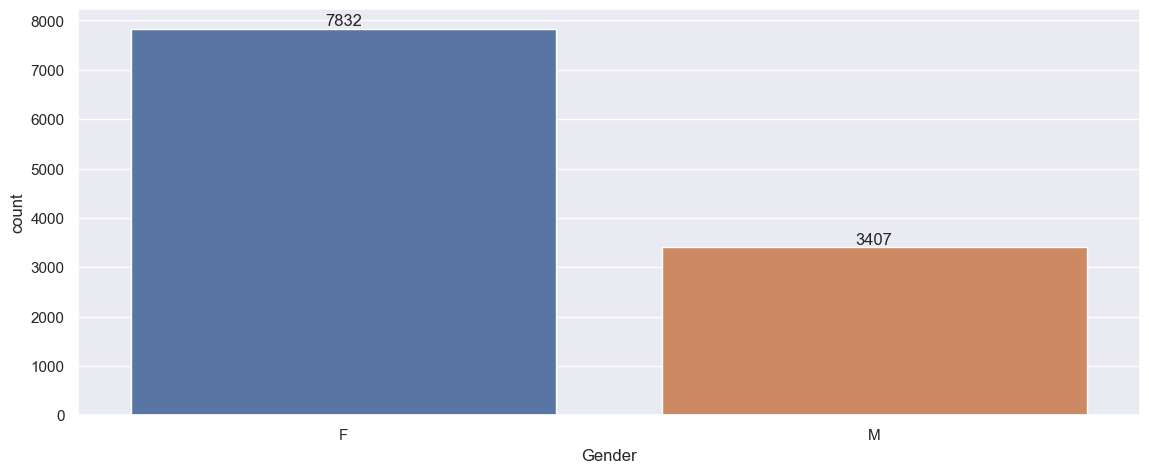

In [77]:
# GENDER
ax=sns.countplot(x=df['Gender'])
for i in ax.containers:
    ax.bar_label(i)

    
# so from this graph we can see that this data has more females , so products of this company are more preferred by Females

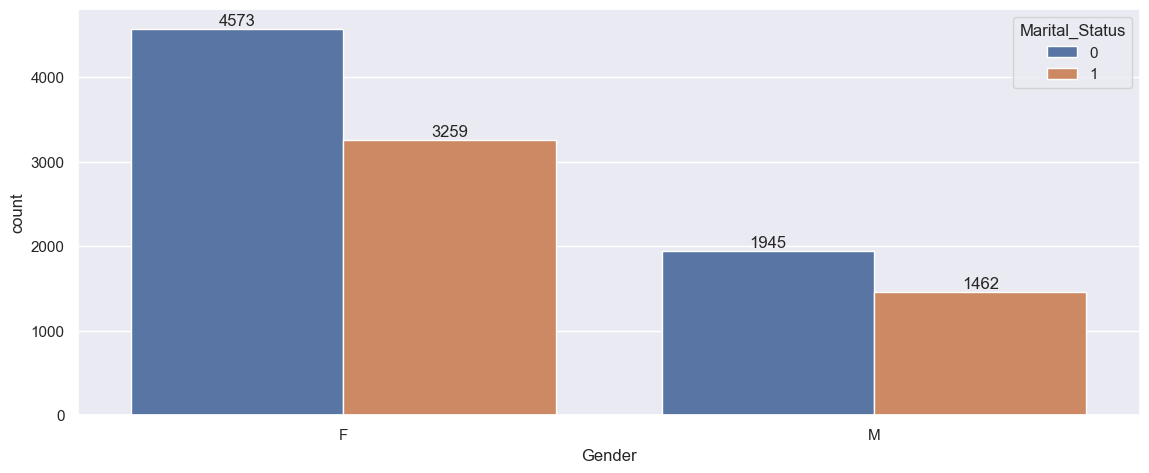

In [64]:
# Let us have a look at the marital status 
ax=sns.countplot(x=df['Gender'],hue=df['Marital_Status'])
# 0 is for unmarried and 1 is for married 
for i in ax.containers:
    ax.bar_label(i)

# we can see that its is slightly more preferred by unmarried people,specially un married females

C:\Users\DELL\AppData\Local\Temp\ipykernel_17532\2999653389.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(x=df['Age'],color='purple',hist=False)


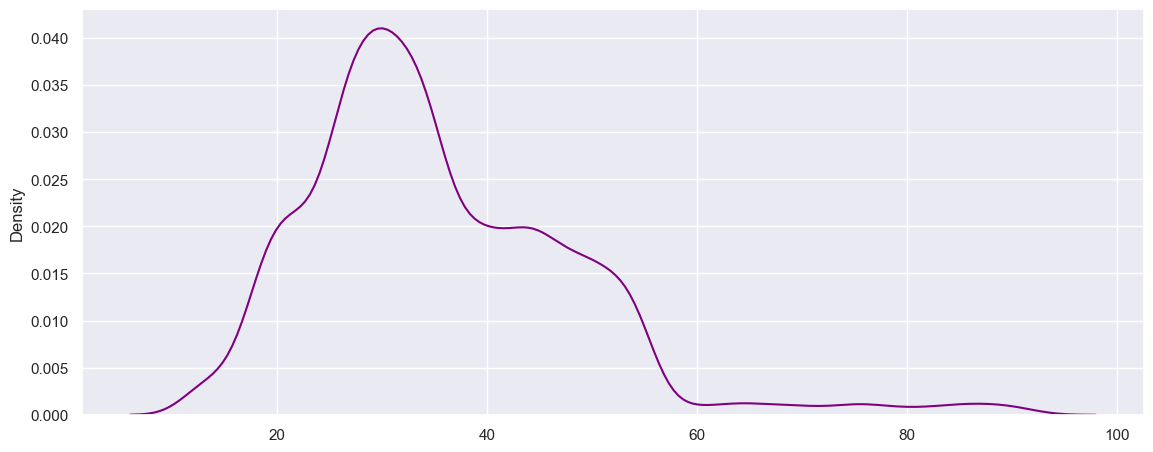

In [86]:
# let us look into the age thing 
# let us plot a histogram
ax=sns.distplot(x=df['Age'],color='purple',hist=False)
# this shows the age distribution of the data set
# from here we can see that less people of older age group and more people of younger age group

In [78]:
df['Age'].mean()
# mean age is 35

35.41035679330901

In [84]:
df[df['Gender']=='M']['Age'].mean()

35.60815967126504

In [85]:
df[df['Gender']=='F']['Age'].mean()

35.32431052093973

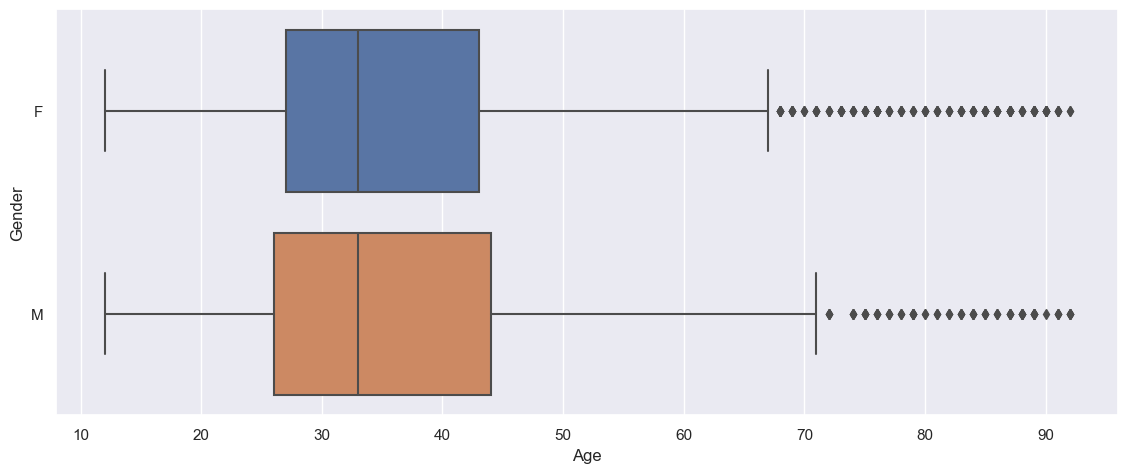

In [66]:
ax=sns.boxplot(x=df['Age'],y=df['Gender'])
# so here we can see that there is not much difference in the male and female age thingi 
# 25 percent males and females ar e under 25
# 25% are above 45
# middle 50% people are of the age group 25-45

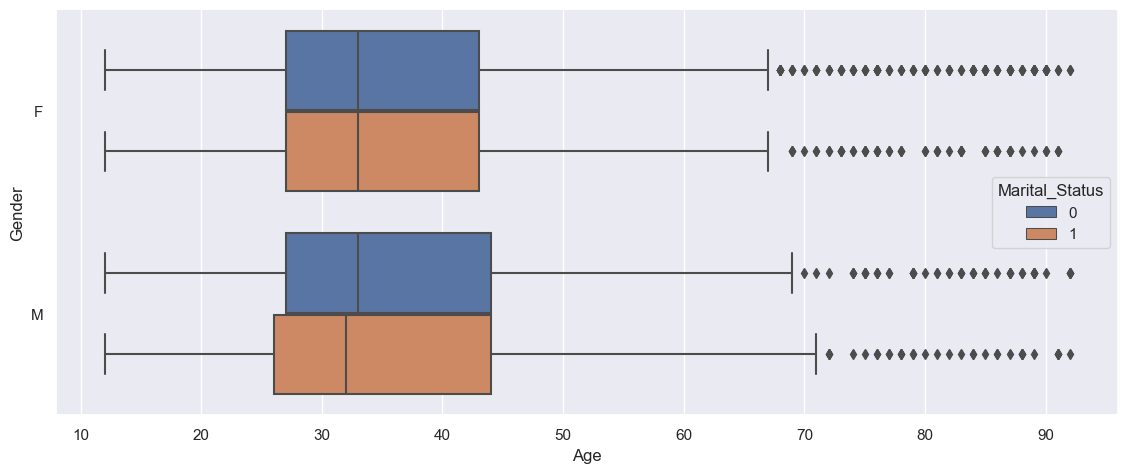

In [67]:
ax=sns.boxplot(x=df['Age'],y=df['Gender'],hue=df['Marital_Status'])
# nothing much here

In [96]:
# lets look up to the amount spent by each gender combined 
df2=df.groupby(['Gender','Marital_Status'],as_index=False)['Total Amount'].sum()
# here i used 'as_index=False' parameter because it was using the column 'Gender' as the index , it was 
# using male and female as index values 
df2.head()

,Gender,Marital_Status,Total Amount
0,F,0,1.092325e+08
1,F,1,7.607436e+07
2,M,0,4.514210e+07
3,M,1,3.320981e+07


<Axes: xlabel='Gender', ylabel='Total Amount'>

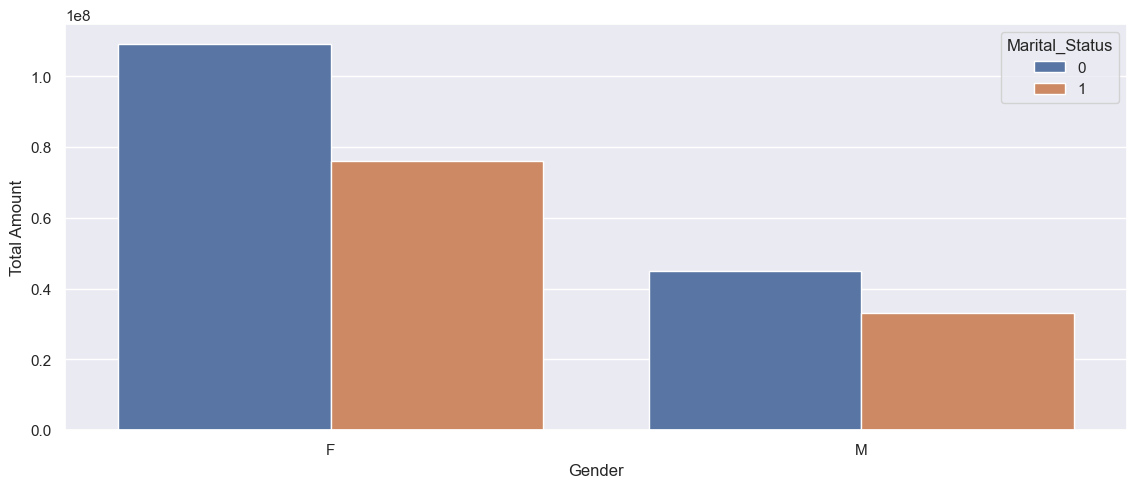

In [102]:
sns.barplot(x='Gender',y='Total Amount',data=df2,hue='Marital_Status')

# amount is spent more by females since there are more female customers
# also un married females have spent more this could be justified by the fact that unnmaried females were in larger nummbers

In [119]:
df3=df.groupby(['State'],as_index=False)['Orders'].count().sort_values(by='Orders',ascending=False)
df3.head()
# from this data frame it is quite visible that most of the customers are from
# Uttar Pradesh ,Maharashtra ,Karnatka

,State,Orders
14,Uttar Pradesh,1944
10,Maharashtra,1525
7,Karnataka,1304
2,Delhi,1104
9,Madhya Pradesh,921


In [118]:
df3=df.groupby(['State','Gender'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False)
df3.head()

,State,Gender,Orders
28,Uttar Pradesh,F,3396
20,Maharashtra,F,2813
14,Karnataka,F,2265
4,Delhi,F,1868
18,Madhya Pradesh,F,1527


In [113]:
# this further reveals that major part of the customers in the state are Females 
sns.set(rc={'figure.figsize':(13.7,5.27)})# the first one is width(13.7) and the second one is height (5.27)

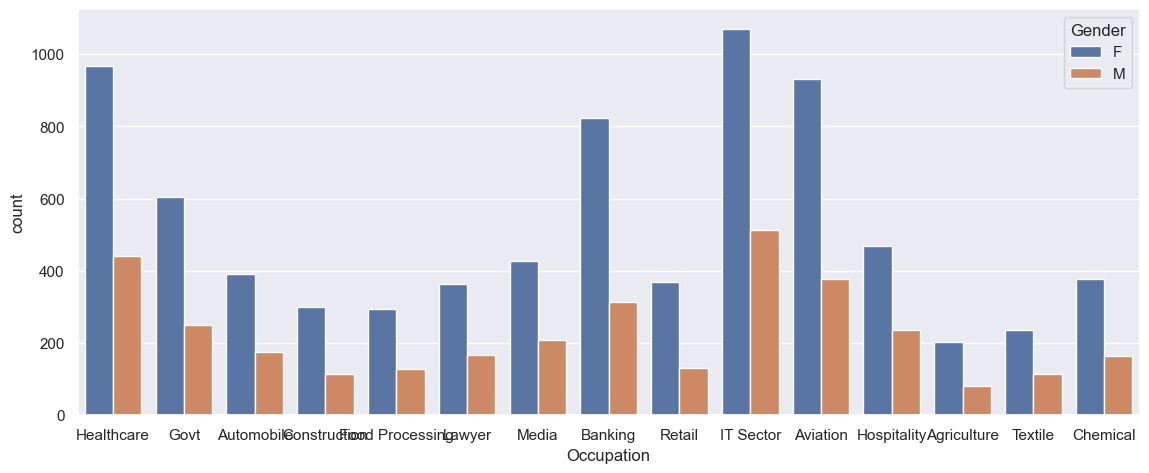

In [114]:
# now let us understand the occupation of the people of the data set
ax=sns.countplot(x=df['Occupation'],hue=df['Gender'])
# most of the people are from IT Aviation and HealthCare sectors 
# most of them are females 

In [120]:
df4=df.groupby(['State','Gender','Occupation'],as_index=False)['Orders'].count().sort_values(by='Orders',ascending=False)
df4.head(10)
# further from this we can see that from the States UP,Karnatka ,Maharashtra females from IT Health care  Aviation and Banking are 
# the prime customers

,State,Gender,Occupation,Orders
426,Uttar Pradesh,F,IT Sector,181
424,Uttar Pradesh,F,Healthcare,178
418,Uttar Pradesh,F,Aviation,173
308,Maharashtra,F,Healthcare,150
302,Maharashtra,F,Aviation,148
310,Maharashtra,F,IT Sector,145
419,Uttar Pradesh,F,Banking,144
303,Maharashtra,F,Banking,128
220,Karnataka,F,IT Sector,122
70,Delhi,F,IT Sector,110


In [123]:
# Now let us see which sector spent the most on the products of this company
df5=df.groupby(['Occupation'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
df5.head(10)
# well again we can see that IT Healthcare Aviation sectors spent the most amount 

,Occupation,Total Amount
10,IT Sector,37076606.00
8,Healthcare,31951142.47
2,Aviation,31109857.00
3,Banking,26760631.90
7,Govt,21326122.00
12,Media,15698242.96
9,Hospitality,15454040.00
1,Automobile,13059402.00
4,Chemical,12889297.00
11,Lawyer,12593296.00


In [125]:
df6=df.groupby(['Occupation','Gender'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
df6.head(10)
# Agin we can see that its the females from the same sector which are spending this much amount

,Occupation,Gender,Total Amount
20,IT Sector,F,25652813.00
16,Healthcare,F,22377372.47
4,Aviation,F,22300734.00
6,Banking,F,19286646.90
14,Govt,F,14931961.00
21,IT Sector,M,11423793.00
24,Media,F,10885133.96
18,Hospitality,F,10440411.00
17,Healthcare,M,9573770.00
26,Retail,F,9363558.00


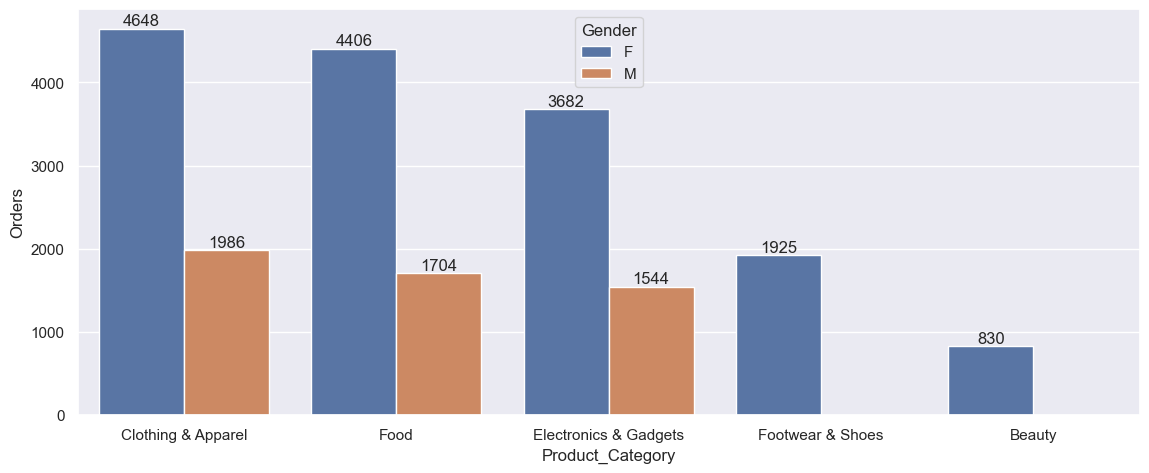

In [131]:
# let us see which product was the most sold product or the hot product 
df7=df.groupby(['Product_Category','Gender'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(8)
df7
ax=sns.barplot(x=df7['Product_Category'],y=df7['Orders'],hue=df7['Gender'])
for i in ax.containers:
      ax.bar_label(i)
# food 
# clothing 
#electronic etc were the most popular categories with the most orders and amount spent , that too by females

In [137]:
# which product has been sold the most 
df.groupby(['Product_Category','Product_ID'],as_index=False)['Orders'].sum().sort_values(by=['Orders'],ascending=False)
# the product POO265242 of FOOD CATEGORY was the hot product with the highest orders 

,Product_Category,Product_ID,Orders
4051,Food,P00265242,44
1098,Clothing & Apparel,P00145042,39
1546,Clothing & Apparel,P00265242,30
3321,Food,P00058042,30
2817,Electronics & Gadgets,P00265242,30
...,...,...,...
1731,Clothing & Apparel,P00319142,1
1736,Clothing & Apparel,P00320442,1
1737,Clothing & Apparel,P00320742,1
5419,Furniture,P00326942,1


In [135]:
df[df['Product_ID']=='P00265242']

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Total Amount
62,1001687,Bruce,P00265242,F,26-35,33,0,Maharashtra,Western,Govt,Stationery,4,85300.0
208,1004161,Murray,P00265242,F,46-50,50,1,Uttar Pradesh,Central,Banking,Furniture,1,20588.0
349,1003934,Ann,P00265242,F,26-35,32,0,Karnataka,Southern,Retail,Footwear & Shoes,4,81040.0
591,1003218,Craig,P00265242,F,55+,63,0,Madhya Pradesh,Central,Agriculture,Food,3,58461.0
812,1004916,Jeremy,P00265242,F,18-25,20,1,Haryana,Northern,Food Processing,Food,4,76700.0
963,1003292,Dipali,P00265242,M,51-55,53,1,Gujarat,Western,Aviation,Food,1,18959.0
1309,1001599,Akshata,P00265242,F,26-35,35,0,Delhi,Central,Food Processing,Footwear & Shoes,1,16506.0
1347,1004220,Hughes,P00265242,F,36-45,38,0,Delhi,Central,Retail,Footwear & Shoes,2,32902.0
1561,1001434,Steven,P00265242,F,0-17,12,0,Himachal Pradesh,Northern,Textile,Games & Toys,2,32298.0
1630,1000965,Cortes,P00265242,F,55+,81,1,Madhya Pradesh,Central,IT Sector,Food,3,47751.0


In [ ]:
# OVER ALL CONCLUSION IS THAT MARRIED/UNMARRIED FEMALES FROM UP KARNATKA MAHARASHTRA , FROM IT HEALTHCARE AVIATION 
# WERE THE MAJOR CUSTOMERS OF THE COMPANY AND THEY WERE INTERESTED IN THE PRODUCTS OF THE CATEGORY FOOD , CLOTHING AND ELECTRONICS